# Sarcasm Detection with Bidirectional LSTM

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

### Read 'Data.csv'

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


### Print some of the Headlines along with the target

In [4]:
for i in range(5):
    print(df['headlines'][i],'.......',df['target'][i])
    print('\n')

CNN Triumphs (At Least in Most Demographic Categories) ....... Non Sarcastic


‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office ....... Sarcastic


New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech ....... Non Sarcastic


Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris ....... Non Sarcastic


God Urges Rick Perry Not To Run For President ....... Sarcastic




### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
freq,1,6531


### Check for missing values

In [7]:
df.isna().sum()

headlines    0
target       0
dtype: int64

### Check for duplicates

In [8]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

<AxesSubplot:xlabel='count', ylabel='target'>

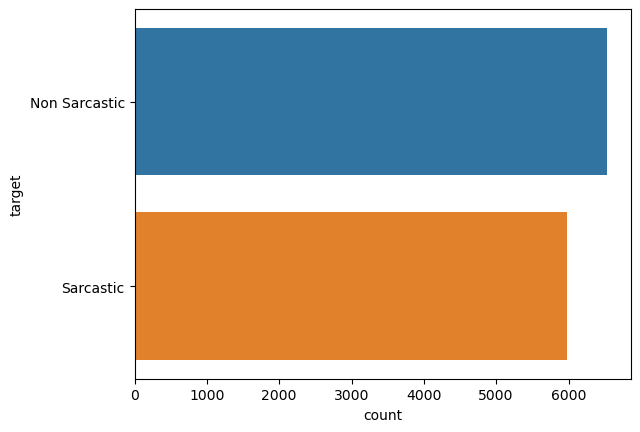

In [9]:
sns.countplot(data=df,y='target')

### Create a funciton to preprocess the text

In [10]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

### Apply the preprocess function to the description

In [11]:
df['headlines']=df['headlines'].apply(preprocess)

In [12]:
for i in range(5):
    print(df['headlines'][i],'.......',df['target'][i])
    print('\n')

cnn triumph at least in most demographic category ....... Non Sarcastic


you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office ....... Sarcastic


new email reveal warm relationship between kamala harris and big tech ....... Non Sarcastic


donald trump jr get slammed over racist birtherism bot attack on kamala harris ....... Non Sarcastic


god urge rick perry not to run for president ....... Sarcastic




### Split Input & Target Variables

In [13]:
x=df['headlines']
y=df['target']

### One Hot encode our Target Variable

In [14]:
def values(i):
    if i=='Non Sarcastic':
        return 0
    elif i=='Sarcastic':
        return 1

y=y.apply(values)
print(y)

0        0
1        1
2        0
3        0
4        1
        ..
12501    0
12502    1
12503    1
12504    0
12505    1
Name: target, Length: 12506, dtype: int64


### Split the dataset into Training & Testing Set

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [16]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)

In [17]:
vocab_size=len(tokenizer.word_index)+1

### fit on text for our X

### Create a function to convert text to numerical representation and add padding

In [18]:
def text_encoding(txt):
    encoded_text=tokenizer.texts_to_sequences(txt)
    
    padded=pad_sequences(encoded_text,maxlen=128)
    
    return padded

### Apply the function to our X_train & X_test

In [23]:
x_train=text_encoding(x_train)
x_test=text_encoding(x_test)

### Create keras Sequential model with BRNN Layers

In [24]:
model=Sequential([
    layers.Embedding(vocab_size,128),
    
    layers.Bidirectional(layers.LSTM(256,return_sequences=True)),
    layers.Dropout(0.2),
    
    layers.Bidirectional(layers.LSTM(256)),
    layers.Dropout(0.2),
    
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    
    layers.Dense(1,activation='sigmoid')
])

### Compile the model

In [25]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

### Train the model with our Training Set

In [27]:
model.fit(x_train,y_train,epochs=1,validation_split=0.05)

279/279 [==============================] - 1221s 4s/step - loss: 0.2039 - accuracy: 0.9209 - val_loss: 0.2647 - val_accuracy: 0.9019


### Make predictions with Test set

In [28]:
y_pred=model.predict(x_test)

98/98 [==============================] - 125s 1s/step


In [30]:
y_pred

array([[0.00834417],
       [0.00897592],
       [0.01410168],
       ...,
       [0.01321613],
       [0.00171992],
       [0.98872375]], dtype=float32)

In [31]:
predicted=[]

for i in y_pred:
    if i>=0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [32]:
predicted

[0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


### Check accuracy score

In [33]:
accuracy_score(y_test,predicted)

0.8960665174288456

### Confusion matrix

<AxesSubplot:>

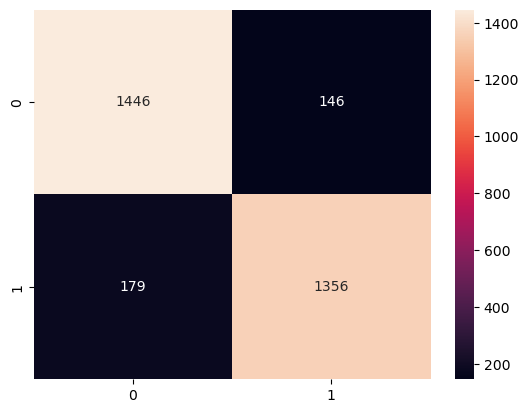

In [34]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

### Classification Report

In [35]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1592
           1       0.90      0.88      0.89      1535

    accuracy                           0.90      3127
   macro avg       0.90      0.90      0.90      3127
weighted avg       0.90      0.90      0.90      3127



***